<a href="https://colab.research.google.com/github/OmarKhaledAbdlhafez/machine-learning-projects-/blob/master/boston_house/boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data

print ("Boston Housing dataset loaded successfully!")

Boston Housing dataset loaded successfully!


In [39]:
print(y_train[0])

28.7


In [12]:
# Number of houses in the dataset
total_houses = housing_prices.shape[0]

# Number of features in the dataset
total_features = housing_features.shape[1]

# Minimum housing value in the dataset
minimum_price = housing_prices.min()

# Maximum housing value in the dataset
maximum_price = housing_prices.max()

# Mean house value of the dataset
mean_price = housing_prices.mean()

# Median house value of the dataset
median_price = np.median(housing_prices)

# Standard deviation of housing values of the dataset
std_dev = housing_prices.std()

# Show the calculated statistics
print ("Boston Housing dataset statistics (in $1000's):\n")
print ("Total number of houses:", total_houses)
print ("Total number of features:", total_features)
print ("Minimum house price:", minimum_price)
print ("Maximum house price:", maximum_price)
print ("Mean house price: {0:.3f}".format(mean_price))
print ("Median house price:", median_price)
print ("Standard deviation of house price: {0:.3f}".format(std_dev))

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


In [13]:
print (CLIENT_FEATURES)

[[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]


In [14]:
# Put any import statements you need for this code block here
from sklearn.model_selection import train_test_split
def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """

    # Shuffle and split the data
    X_train ,X_test,y_train,y_test =train_test_split(X, y, test_size=0.3, random_state=42)

    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print ("Successfully shuffled and split the data!")
except:
    print ("Something went wrong with shuffling and splitting the data.")

Successfully shuffled and split the data!


In [22]:
# Put any import statements you need for this code block here
from sklearn.metrics import f1_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """

    error = f1_score(y_true,y_predict)
    return error


# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print ("Successfully performed a metric calculation!")
except:
    print ("Something went wrong with performing a metric calculation.")

Something went wrong with performing a metric calculation.


In [16]:
# Put any import statements you need for this code block
from sklearn.model_selection import GridSearchCV
def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    #scoring_function = None

    # Make the GridSearchCV object
    reg = GridSearchCV(regressor, parameters)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg.best_estimator_


# Test fit_model on entire dataset
try:
    reg = fit_model(housing_features, housing_prices)
    print ("Successfully fit a model!")
except:
    print ("Something went wrong with fitting a model.")

Successfully fit a model!


In [24]:
print( "Final model has an optimal max_depth parameter of", reg.get_params()['max_depth'])

Final model has an optimal max_depth parameter of 3


In [45]:
score =reg.score(X_test,y_test)
print(score)

0.7953945781505839


In [26]:
sale_price = reg.predict(CLIENT_FEATURES)
print ("Predicted value of client's home: {0:.3f}".format(sale_price[0]))

Predicted value of client's home: 22.905


In [0]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print ("Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .")
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            #train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            train_err[i]=regressor.score(X_train[:s], y_train[:s])
            
            # Find the performance on the testing set
            test_err[i] =regressor.score(X_test,y_test)
            # performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


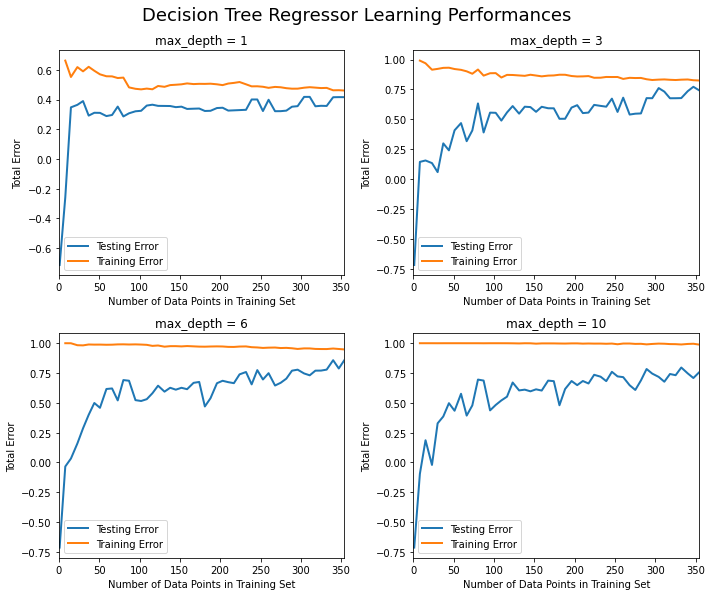

In [48]:
learning_curves(X_train, y_train, X_test, y_test)

In [0]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print ("Creating a model complexity graph. . . ")

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i]=regressor.score(X_train, y_train)
            
            # Find the performance on the testing set
        test_err[i] =regressor.score(X_test,y_test)

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

Creating a model complexity graph. . . 


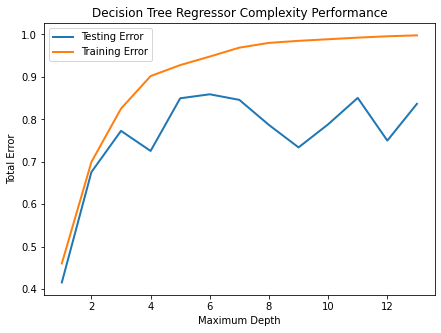

In [53]:
model_complexity(X_train, y_train, X_test, y_test)